<a href="https://colab.research.google.com/github/honatanpalma/t1-fe-grupo6/blob/main/Tarea_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hoja de Trabajo \# 1 


---


por Josué Obregón <br>
DS6011 - Feature Engineering <br>
UVG Masters - Escuela de Negocios<br>


## Objetivos

El objetivo principal de esta hoja de trabajo  es familiarizar al estudiante en dos aspectos importantes para el desarrollo de la clase en general.

El primer aspecto es el concepto básico de lo que es **Feature Engineering**. Esto lo lograremos con un ejemplo sencillo de aplicación de la transformación de las variables predictoras para obtener mejores resultados en un modelo predictivo.

El segundo aspecto es el uso de las diferentes herramientas de tecnología que utilizaremos a lo largo del curso: GitHub, Google colab y la librería scikit-learn.

## Importación de librerías y carga de los datos a un pandas [DataFrame](https://pandas.pydata.org/pandas-docs/version/1.1.5/reference/frame.html)


Las librerías que importaremos para empezar son pandas para el manejo de los datos y matplotlib para realizar algunas gráficas. 

Los datos fueron obtenidos de un estudio de la calidad de la segmentación de imagenes para células SK-BR-3. [Link al artículo con detalles de los datos](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-8-340#Sec22) -- [Link a los datos](https://static-content.springer.com/esm/art%3A10.1186%2F1471-2105-8-340/MediaObjects/12859_2006_1712_MOESM1_ESM.csv)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sample_data/INC06.csv', low_memory=False)

In [ ]:
dfo = pd.read_csv('sample_data/INC06.csv', low_memory=False)

In [ ]:
dfs = dfo

In [ ]:
df.head()

,ACCUMULATEDHOLDTIME,ACTUALFINISH,ACTUALSTART,MINUTOS_DURACION_AFECTACION,HORAS_DURACION_AFECTACION,DURACION_TIEMPO_ATENCION,ADJUSTEDTARGETRESOLUTIONTIME,AFFECTEDDATE,HORA_AFECTACION,TURNO,...,GLOBALTICKETID,PMCCIIMPACT,SOURCESYSID,OWNERSYSID,LOCATION,LOCATION_DESCRIPTION,LOCATION_CITY,LOCATION_DEPTO,CRITICO,CASE
0,0.0,1/01/2023 08:31,1/01/2023 00:22,489,8.00,3,NaN,1/01/2023 00:19,0,Nocturno,...,NaN,NaN,14.30111,-90.35708,SRS681,BARBERENA,BARBERENA,SANTA ROSA,NaN,train
1,0.0,1/01/2023 09:22,1/01/2023 00:32,529,9.00,48,NaN,31/12/2022 23:44,23,Nocturno,...,NaN,1.0,14.37881,-90.28575,SRS688,NUEVA SANTA ROSA,NUEVA SANTA ROSA,SANTA ROSA,NaN,train
2,0.0,1/01/2023 08:07,1/01/2023 04:43,204,3.00,304,NaN,31/12/2022 23:36,23,Nocturno,...,31489538.0,3.0,15.83373,-89.42787,AVP789,RANCHO JOSE Y JOSE,CHAHAL,ALTA VERAPAZ,NaN,train
3,0.0,1/01/2023 13:46,1/01/2023 04:54,532,9.00,208,NaN,1/01/2023 01:25,1,Nocturno,...,31489549.0,3.0,16.05865,-89.77817,PTN521,ROSA ATITLAN,SAN LUIS,PETEN,NaN,train
4,0.0,1/01/2023 13:46,1/01/2023 04:54,532,9.00,208,NaN,1/01/2023 01:24,1,Nocturno,...,31489549.0,2.0,16.06111,-89.69531,PTN393,MACHAQUILAITO,SAN LUIS,PETEN,NaN,train


In [ ]:
df.describe()

,ACCUMULATEDHOLDTIME,DURACION_TIEMPO_ATENCION,HORA_AFECTACION,CLASSIFICATIONID,ISGLOBAL,RELATEDTOGLOBAL,ISMAINTENANCE,HASACTIVITY,HASLD,HASSOLUTION,...,REPORTECARTOGRAFICO,REPORTEDPRIORITY,SELFSERVSOLACCESS,SITEVISIT,SOLUTION,TICKETID,TK_HIJOS,GLOBALTICKETID,PMCCIIMPACT,CRITICO
count,6626.000000,6626.000000,6626.000000,6.626000e+03,6626.000000,6626.000000,6626.000000,6626.000000,6626.0,6626.000000,...,6626.000000,1006.000000,6626.0,6626.000000,2.744000e+03,6.626000e+03,6626.000000,2.988000e+03,2465.000000,6.0
mean,7.238777,172.117718,14.072140,9.627144e+11,0.120133,0.450951,0.121340,0.086176,1.0,0.738756,...,0.000604,3.257455,0.0,0.078328,1.558362e+06,3.183443e+07,0.731210,3.181126e+07,2.701014,1.0
std,51.584251,258.855833,6.149969,4.299000e+12,0.325141,0.497626,0.326547,0.280644,0.0,0.439346,...,0.024564,0.646705,0.0,0.268707,6.272905e+05,2.020125e+05,4.573035,2.051003e+05,0.679789,0.0
min,0.000000,0.000000,0.000000,2.025000e+03,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,3.000000,0.0,0.000000,1.014000e+03,3.148600e+07,0.000000,3.035199e+07,1.000000,1.0
25%,0.000000,15.000000,9.000000,2.025010e+07,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,3.000000,0.0,0.000000,1.811010e+06,3.167283e+07,0.000000,3.164995e+07,3.000000,1.0
50%,0.000000,53.000000,18.000000,2.025011e+07,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,...,0.000000,3.000000,0.0,0.000000,1.811048e+06,3.181744e+07,0.000000,3.178262e+07,3.000000,1.0
75%,0.000000,210.750000,18.000000,2.025020e+09,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,...,0.000000,3.000000,0.0,0.000000,1.811048e+06,3.201991e+07,0.000000,3.197764e+07,3.000000,1.0
max,978.700000,1428.000000,23.000000,2.030000e+13,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,5.000000,0.0,1.000000,1.813932e+06,3.218829e+07,115.000000,3.218583e+07,3.000000,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6626 entries, 0 to 6625
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ACCUMULATEDHOLDTIME           6626 non-null   float64
 1   ACTUALFINISH                  6626 non-null   object 
 2   ACTUALSTART                   6626 non-null   object 
 3   MINUTOS_DURACION_AFECTACION   6626 non-null   object 
 4   HORAS_DURACION_AFECTACION     6626 non-null   object 
 5   DURACION_TIEMPO_ATENCION      6626 non-null   int64  
 6   ADJUSTEDTARGETRESOLUTIONTIME  1671 non-null   object 
 7   AFFECTEDDATE                  6626 non-null   object 
 8   HORA_AFECTACION               6626 non-null   int64  
 9   TURNO                         6626 non-null   object 
 10  AFFECTEDEMAIL                 1325 non-null   object 
 11  AFFECTEDPERSON                6385 non-null   object 
 12  AFFECTEDPHONE                 537 non-null    object 
 13  ASS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

<ipython-input-110-8ea533fc6edd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.set_index('AFFECTEDDATE').corr()


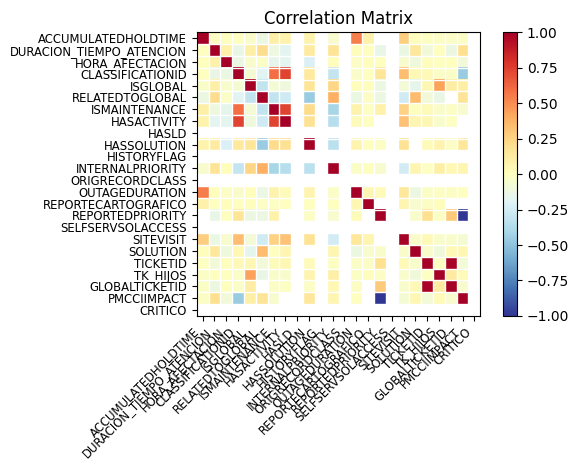

In [ ]:
corr = df.set_index('AFFECTEDDATE').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()


In [ ]:
columns = ['HORA_AFECTACION', 'MINUTOS_DURACION_AFECTACION', 'TURNO', 'CASE']
new_names = ['PredictorA','PredictorB', 'Class', 'Case']

In [ ]:
df = df[columns]
df.columns = new_names

In [ ]:
df.head()

,PredictorA,PredictorB,Class,Case
0,0,489,Nocturno,train
1,23,529,Nocturno,train
2,23,204,Nocturno,train
3,1,532,Nocturno,train
4,1,532,Nocturno,train


In [ ]:
train = df[df['Case']=='train']
test = df[df['Case']=='test']

In [ ]:
color_dict = {'Nocturno':'cornflowerblue', 'Tarde':'darkorange', 'Matutino': 'blue'}
df['color']= df['Class'].map(color_dict)

<ipython-input-115-f4b7cf681139>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color']= df['Class'].map(color_dict)


In [ ]:
train.head()

,PredictorA,PredictorB,Class,Case
0,0,489,Nocturno,train
1,23,529,Nocturno,train
2,23,204,Nocturno,train
3,1,532,Nocturno,train
4,1,532,Nocturno,train


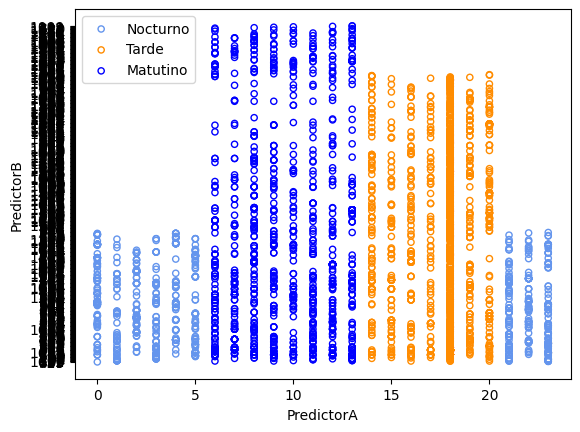

In [ ]:
fig, ax = plt.subplots()
for class_ in pd.unique(df['Class']):
  train[train['Class']==class_].plot.scatter('PredictorA','PredictorB', c='none', edgecolor=color_dict[class_],label=class_, ax=ax)

## Exploración de los predictores

La ROC-AUC obtenida con los predictores sin ningún tipo de procesmaiento arrojó un valor de 0.79, el cual es un resultado decente, pero probablemente se puede mejorar. 

Primero veamos el resumen de estadísticos y luego veamos la distribución de los valores en los dos predictores. 

In [ ]:
X_train = train[['PredictorA','PredictorB']]
y_train = train['Class']

X_test = test[['PredictorA','PredictorB']]
y_test = test['Class']

In [ ]:
train.describe()

,PredictorA
count,4519.000000
mean,14.039389
std,6.145697
min,0.000000
25%,9.000000
50%,18.000000
75%,18.000000
max,23.000000


# **TRANSFORMACION BOX COX**
UTILIZANDO VARIABLE DTA = DURACION_TIEMPO_ATENCION

**Vamos a realizar la normalizacion de box cox en una de nuestras variables de interes llamada DURACION_TIEMPO_ATENCION, tomamos en cuenta que box cox funciona con valires positivos por lo que tomamos en cuenta sólo los valores mayores a 0**





In [ ]:
DTA = dfo[dfo['DURACION_TIEMPO_ATENCION'] > 0]

**Realizamos un describe y lo primero que vemos que la media está muy 
lejana de la desviación estandar, por lo que nos inicia a dar indicios que no será una distribución normal, vemos tambien con el min y el max que hay un rango muy amplio que comparado con la media podemos ir denotando demaciados outliers**

In [ ]:
DTA = DTA['DURACION_TIEMPO_ATENCION'] 
DTA.describe()

count    6380.000000
mean      178.754232
std       261.541366
min         1.000000
25%        18.000000
50%        57.000000
75%       235.000000
max      1428.000000
Name: DURACION_TIEMPO_ATENCION, dtype: float64

**Realizamos un plot para ver el tipo de distribución**

(array([4279.,  689.,  435.,  438.,  183.,  114.,   75.,   83.,   53.,
          31.]),
 array([1.0000e+00, 1.4370e+02, 2.8640e+02, 4.2910e+02, 5.7180e+02,
        7.1450e+02, 8.5720e+02, 9.9990e+02, 1.1426e+03, 1.2853e+03,
        1.4280e+03]),
 <BarContainer object of 10 artists>)

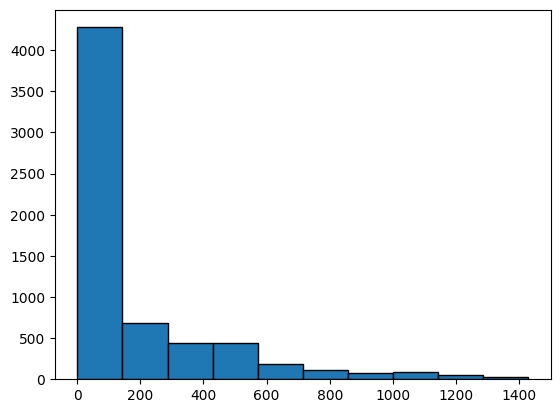

In [ ]:
plt.hist(DTA, edgecolor = "black", linewidth=1)

**En la gráfica anterior vemos que NO es una distribución normal, sino una distribución exponencial, de igual forma realizamos un gráfico Quantile para corroborar si existe normalidad de los datos**

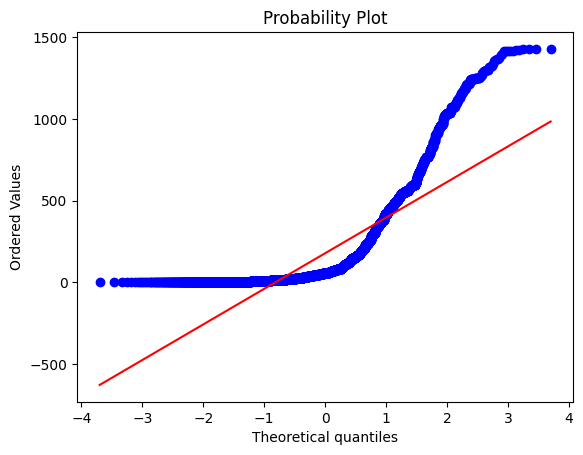

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(DTA, dist="norm", plot=pylab)
pylab.show()

**En la gráfica anterior vemos hay discrepancias entre los puntos con la linea recta, por lo que NO existe una distribución normal de los datos de la variable DURACION_TIEMPO_ATENCION**  

In [ ]:
from scipy.stats import shapiro
estadistico, p_value = shapiro(DTA)
print('Estadistico=%.3f, p_value=%.3f' % (estadistico, p_value))

Estadistico=0.693, p_value=0.000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**En la seccion anterior realizamos una PRUEBA DE SHAPIRO para identificar el p_value si es mayor a 0.05 para aceptar nuestra hipotesis de que si es una distribución normal, pero vemos que obtuvimos un 0.000 por lo que en efecto no hay una distribución normal.***

**Ahora vamos a proceder a realizar la transformación con BOX COX y luego de la transformación realizaremos de nuevo el plot hist y la prueba de shapiro para ver si se logra normalizar la variable de interes.***

<ipython-input-125-6a3396b44457>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original_data, hist = False, kde = True,
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-125-6a3396b44457>:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or 

Lambda value used for Transformation: 0.07954086076652965


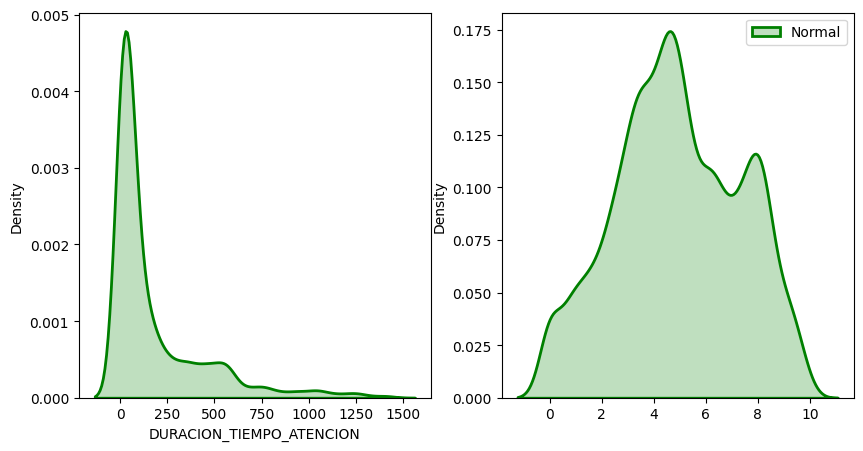

In [ ]:
# Importamos los módulos
import numpy as np
from scipy import stats
 
# importamos modulos para plotear
import seaborn as sns
import matplotlib.pyplot as plt
 
# definimos la variable original data con la variable Duracion Tiempo Afectación definida arriba.
original_data = DTA
 
# Realizamos la transformación y guardamos el resultado de lambda
fitted_data, fitted_lambda = stats.boxcox(original_data)

# Definimos los ejes para plotear las gráficas
fig, ax = plt.subplots(1, 2)
 
# Ploteamos la data original

sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
# Ploteamos la data ya transformada
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# Agregamos leyenda al sub plot
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

**Vemos que arriba utilizó un parametro de transformación de 0.0795, sin embargo podemos ver que si logró hacer una transformación, sin embargo no se consigue una distribución normal, sino más se asemeja a una distribución bimodal**

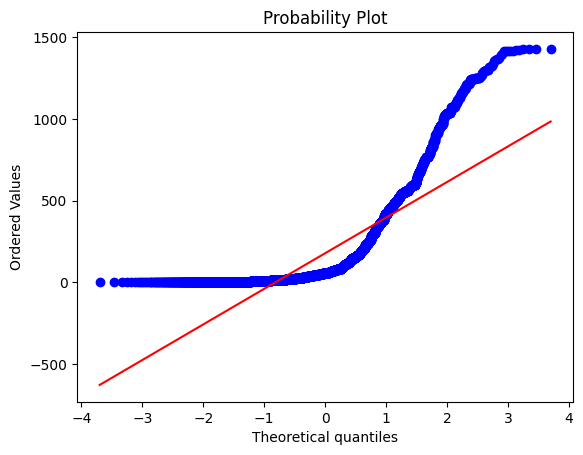

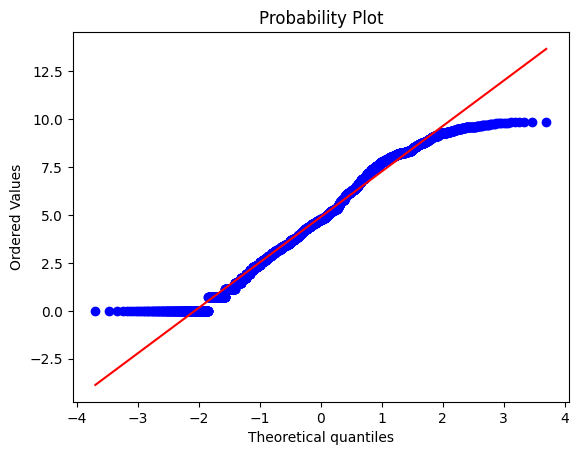

In [ ]:
stats.probplot(DTA, dist="norm", plot=pylab)
pylab.show()

stats.probplot(fitted_data, dist="norm", plot=pylab)
pylab.show()

In [ ]:
from scipy.stats import shapiro
estadistico, p_value = shapiro(fitted_data)
print('Estadistico=%.3f, p_value=%.3f' % (estadistico, p_value))

Estadistico=0.982, p_value=0.000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Podemos concluir que luego de la transformación, no existe una distribución "normal" utilizando el método de box cox para la variable DTA = DURACION_TIEMPO_ATENCION, por lo tanto se puede considerar utilizar otro método de transformación**

# **ORDINAL ENCODER**

**vamos a intentar otra transformación con la variable DTA = DURACION_TIEMPO_ATENCION que respresenta las horas que duró el incidente, vamos a intentar Ordinal Econder, ya que las horas de afectación si tienen un orden en su valor, porque no es lo mismo un incidente que afecta 1 hora a un incidente que afecte 24 hrs.

**Lo primero es que categorizamos nuestros valores de la duración si está entre 0 y 8 entra como Bajo, si está entre 8 y 16 entra como Medio y si está mayor a 16 entra como una categoria de tiempo alto.

In [ ]:
DTA2 = dfo[dfo['DURACION_TIEMPO_ATENCION'] >= 0]

In [ ]:
DTA2 = DTA2['DURACION_TIEMPO_ATENCION'] 
DTA2.describe()

count    6626.000000
mean      172.117718
std       258.855833
min         0.000000
25%        15.000000
50%        53.000000
75%       210.750000
max      1428.000000
Name: DURACION_TIEMPO_ATENCION, dtype: float64

In [ ]:
DTA2['Clasificacion'] = pd.cut(dfo.DURACION_TIEMPO_ATENCION, bins=[0, 8, 24, float('Inf')], labels=['Bajo','Medio', 'Alto'])

In [ ]:
DTA2.Clasificacion.value_counts()

Alto     4380
Medio    1060
Bajo      940
Name: DURACION_TIEMPO_ATENCION, dtype: int64

In [ ]:
DTA3 = DTA2['Clasificacion']


In [ ]:
DTA3["Clasificacion"].unique()

KeyError: ignored

In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
DTA4 = DTA2.fillna(0)

In [ ]:
DTA4["Clasificacion"].unique()

['Bajo', 'Alto', 'Medio', NaN]
Categories (3, object): ['Bajo' < 'Medio' < 'Alto']

In [ ]:
enc = OrdinalEncoder()

In [ ]:
print(enc)

OrdinalEncoder()


In [ ]:
enc.fit_transform(DTA2[["Clasificacion"]])

ValueError: ignored

# **TRANSFORMACION ONE HOT ENCODING**
UTILIZANDO VARIABLE CATEGORICA TURNO (Matutino, Tarde, Nocturno)

**Actualmente en el centro de operacion de red hay 3 turnos, matutino, tarde y nocturno, y esta variable categorica nos indica en que turno se aperturó el incidente.

In [ ]:
dfo["TURNO"].unique()

array(['Nocturno', 'Tarde', 'Matutino'], dtype=object)

**Arriba obtenemos los valores únicos de la variable TURNO y vemos que está compuesto por los tres valores: Nocturno, Tarde y Matutino.**

Iniciamos a importar OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

**Le aplicamos fit transform al data frame original (dfo) a la variable "Turno"**

In [ ]:
ohe = OneHotEncoder()
ohe.fit_transform(dfo[["TURNO"]]).toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
feature_arry = ohe.fit_transform(dfo[["TURNO"]]).toarray()
ohe.categories_
feature_labels = ohe.categories_
np.array(feature_labels).ravel()

array(['Matutino', 'Nocturno', 'Tarde'], dtype=object)

In [ ]:
print(feature_labels)

[array(['Matutino', 'Nocturno', 'Tarde'], dtype=object)]


**OBtenemos la nueva transformación con las nuevas 3 columnas "Matutino", "Nocturno" y "Tarde".**

In [ ]:
features = pd.DataFrame(feature_arry, columns = feature_labels)

In [ ]:
print(features)

     Matutino Nocturno Tarde
0         0.0      1.0   0.0
1         0.0      1.0   0.0
2         0.0      1.0   0.0
3         0.0      1.0   0.0
4         0.0      1.0   0.0
...       ...      ...   ...
6621      0.0      0.0   1.0
6622      0.0      1.0   0.0
6623      0.0      0.0   1.0
6624      0.0      0.0   1.0
6625      0.0      1.0   0.0

[6626 rows x 3 columns]


**Concatenamos los 3 nuevos features obtenidos anteriormente con el Data Frame Original (dfo).**

In [ ]:
pd.concat([dfo,features], axis=1)

,ACCUMULATEDHOLDTIME,ACTUALFINISH,ACTUALSTART,MINUTOS_DURACION_AFECTACION,HORAS_DURACION_AFECTACION,DURACION_TIEMPO_ATENCION,ADJUSTEDTARGETRESOLUTIONTIME,AFFECTEDDATE,HORA_AFECTACION,TURNO,...,OWNERSYSID,LOCATION,LOCATION_DESCRIPTION,LOCATION_CITY,LOCATION_DEPTO,CRITICO,CASE,"(Matutino,)","(Nocturno,)","(Tarde,)"
0,0.00,1/01/2023 08:31,1/01/2023 00:22,489,8.00,3,NaN,1/01/2023 00:19,0,Nocturno,...,-90.35708,SRS681,BARBERENA,BARBERENA,SANTA ROSA,NaN,train,0.0,1.0,0.0
1,0.00,1/01/2023 09:22,1/01/2023 00:32,529,9.00,48,NaN,31/12/2022 23:44,23,Nocturno,...,-90.28575,SRS688,NUEVA SANTA ROSA,NUEVA SANTA ROSA,SANTA ROSA,NaN,train,0.0,1.0,0.0
2,0.00,1/01/2023 08:07,1/01/2023 04:43,204,3.00,304,NaN,31/12/2022 23:36,23,Nocturno,...,-89.42787,AVP789,RANCHO JOSE Y JOSE,CHAHAL,ALTA VERAPAZ,NaN,train,0.0,1.0,0.0
3,0.00,1/01/2023 13:46,1/01/2023 04:54,532,9.00,208,NaN,1/01/2023 01:25,1,Nocturno,...,-89.77817,PTN521,ROSA ATITLAN,SAN LUIS,PETEN,NaN,train,0.0,1.0,0.0
4,0.00,1/01/2023 13:46,1/01/2023 04:54,532,9.00,208,NaN,1/01/2023 01:24,1,Nocturno,...,-89.69531,PTN393,MACHAQUILAITO,SAN LUIS,PETEN,NaN,train,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6621,0.00,31/01/2023 07:42,31/01/2023 07:41,0,0.00,541,NaN,31/12/1969 18:00,18,Tarde,...,NaN,TH,NaN,NaN,NaN,NaN,test,0.0,0.0,1.0
6622,11.95,31/01/2023 10:55,30/01/2023 22:46,729,12.00,1,41:52.5,30/01/2023 22:44,22,Nocturno,...,-90.8305,CHM719,MIGUEL HIDALGO,CHIMALTENANGO,CHIMALTENANGO,NaN,train,0.0,1.0,0.0
6623,0.00,30/01/2023 23:20,30/01/2023 23:07,13,0.00,5,NaN,31/12/1969 18:00,18,Tarde,...,-90.7869,ESC862,PLAZA PALMERAS,ESCUINTLA,ESCUINTLA,NaN,train,0.0,0.0,1.0
6624,0.00,31/01/2023 07:44,31/01/2023 07:43,1,0.00,517,NaN,31/12/1969 18:00,18,Tarde,...,-91.48431,HHT348,HUEHUETENANGO VII,HUEHUETENANGO,HUEHUETENANGO,NaN,train,0.0,0.0,1.0


## Feature Scaling

In [ ]:
#Code

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
dfs.head()

,ACCUMULATEDHOLDTIME,ACTUALFINISH,ACTUALSTART,MINUTOS_DURACION_AFECTACION,HORAS_DURACION_AFECTACION,DURACION_TIEMPO_ATENCION,ADJUSTEDTARGETRESOLUTIONTIME,AFFECTEDDATE,HORA_AFECTACION,TURNO,...,GLOBALTICKETID,PMCCIIMPACT,SOURCESYSID,OWNERSYSID,LOCATION,LOCATION_DESCRIPTION,LOCATION_CITY,LOCATION_DEPTO,CRITICO,CASE
0,0.0,1/01/2023 08:31,1/01/2023 00:22,489,8.00,3,NaN,1/01/2023 00:19,0,Nocturno,...,NaN,NaN,14.30111,-90.35708,SRS681,BARBERENA,BARBERENA,SANTA ROSA,NaN,train
1,0.0,1/01/2023 09:22,1/01/2023 00:32,529,9.00,48,NaN,31/12/2022 23:44,23,Nocturno,...,NaN,1.0,14.37881,-90.28575,SRS688,NUEVA SANTA ROSA,NUEVA SANTA ROSA,SANTA ROSA,NaN,train
2,0.0,1/01/2023 08:07,1/01/2023 04:43,204,3.00,304,NaN,31/12/2022 23:36,23,Nocturno,...,31489538.0,3.0,15.83373,-89.42787,AVP789,RANCHO JOSE Y JOSE,CHAHAL,ALTA VERAPAZ,NaN,train
3,0.0,1/01/2023 13:46,1/01/2023 04:54,532,9.00,208,NaN,1/01/2023 01:25,1,Nocturno,...,31489549.0,3.0,16.05865,-89.77817,PTN521,ROSA ATITLAN,SAN LUIS,PETEN,NaN,train
4,0.0,1/01/2023 13:46,1/01/2023 04:54,532,9.00,208,NaN,1/01/2023 01:24,1,Nocturno,...,31489549.0,2.0,16.06111,-89.69531,PTN393,MACHAQUILAITO,SAN LUIS,PETEN,NaN,train


In [ ]:
dfs.tail()

,ACCUMULATEDHOLDTIME,ACTUALFINISH,ACTUALSTART,MINUTOS_DURACION_AFECTACION,HORAS_DURACION_AFECTACION,DURACION_TIEMPO_ATENCION,ADJUSTEDTARGETRESOLUTIONTIME,AFFECTEDDATE,HORA_AFECTACION,TURNO,...,GLOBALTICKETID,PMCCIIMPACT,SOURCESYSID,OWNERSYSID,LOCATION,LOCATION_DESCRIPTION,LOCATION_CITY,LOCATION_DEPTO,CRITICO,CASE
6621,0.00,31/01/2023 07:42,31/01/2023 07:41,0,0.00,541,NaN,31/12/1969 18:00,18,Tarde,...,NaN,NaN,NaN,NaN,TH,NaN,NaN,NaN,NaN,test
6622,11.95,31/01/2023 10:55,30/01/2023 22:46,729,12.00,1,41:52.5,30/01/2023 22:44,22,Nocturno,...,NaN,NaN,14.66096,-90.8305,CHM719,MIGUEL HIDALGO,CHIMALTENANGO,CHIMALTENANGO,NaN,train
6623,0.00,30/01/2023 23:20,30/01/2023 23:07,13,0.00,5,NaN,31/12/1969 18:00,18,Tarde,...,NaN,NaN,14.30691,-90.7869,ESC862,PLAZA PALMERAS,ESCUINTLA,ESCUINTLA,NaN,train
6624,0.00,31/01/2023 07:44,31/01/2023 07:43,1,0.00,517,NaN,31/12/1969 18:00,18,Tarde,...,NaN,NaN,15.31015,-91.48431,HHT348,HUEHUETENANGO VII,HUEHUETENANGO,HUEHUETENANGO,NaN,train
6625,0.00,31/01/2023 00:18,30/01/2023 23:21,57,1.00,0,NaN,30/01/2023 23:20,23,Nocturno,...,NaN,NaN,14.95904,-89.52367,ZCP583,ZACAPA,ZACAPA,ZACAPA,NaN,train


In [ ]:
dff = dfs.replace(['#NUM!'], '0')

In [ ]:
dff['MINUTOS_DURACION_AFECTACION'] = dff['MINUTOS_DURACION_AFECTACION'].astype(float)

In [33]:
dff['INTERNALPRIORITY'] = dff['INTERNALPRIORITY'].astype(float)

In [34]:
dff['DURACION_TIEMPO_ATENCION'] = dff['DURACION_TIEMPO_ATENCION'].astype(float)

In [ ]:
dff.dtypes

ACCUMULATEDHOLDTIME            float64
ACTUALFINISH                    object
ACTUALSTART                     object
MINUTOS_DURACION_AFECTACION    float64
HORAS_DURACION_AFECTACION       object
                                ...   
LOCATION_DESCRIPTION            object
LOCATION_CITY                   object
LOCATION_DEPTO                  object
CRITICO                        float64
CASE                            object
Length: 68, dtype: object

In [32]:
dff

,ACCUMULATEDHOLDTIME,ACTUALFINISH,ACTUALSTART,MINUTOS_DURACION_AFECTACION,HORAS_DURACION_AFECTACION,DURACION_TIEMPO_ATENCION,ADJUSTEDTARGETRESOLUTIONTIME,AFFECTEDDATE,HORA_AFECTACION,TURNO,...,GLOBALTICKETID,PMCCIIMPACT,SOURCESYSID,OWNERSYSID,LOCATION,LOCATION_DESCRIPTION,LOCATION_CITY,LOCATION_DEPTO,CRITICO,CASE
0,0.00,1/01/2023 08:31,1/01/2023 00:22,489.0,8.00,3,NaN,1/01/2023 00:19,0,Nocturno,...,NaN,NaN,14.30111,-90.35708,SRS681,BARBERENA,BARBERENA,SANTA ROSA,NaN,train
1,0.00,1/01/2023 09:22,1/01/2023 00:32,529.0,9.00,48,NaN,31/12/2022 23:44,23,Nocturno,...,NaN,1.0,14.37881,-90.28575,SRS688,NUEVA SANTA ROSA,NUEVA SANTA ROSA,SANTA ROSA,NaN,train
2,0.00,1/01/2023 08:07,1/01/2023 04:43,204.0,3.00,304,NaN,31/12/2022 23:36,23,Nocturno,...,31489538.0,3.0,15.83373,-89.42787,AVP789,RANCHO JOSE Y JOSE,CHAHAL,ALTA VERAPAZ,NaN,train
3,0.00,1/01/2023 13:46,1/01/2023 04:54,532.0,9.00,208,NaN,1/01/2023 01:25,1,Nocturno,...,31489549.0,3.0,16.05865,-89.77817,PTN521,ROSA ATITLAN,SAN LUIS,PETEN,NaN,train
4,0.00,1/01/2023 13:46,1/01/2023 04:54,532.0,9.00,208,NaN,1/01/2023 01:24,1,Nocturno,...,31489549.0,2.0,16.06111,-89.69531,PTN393,MACHAQUILAITO,SAN LUIS,PETEN,NaN,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6621,0.00,31/01/2023 07:42,31/01/2023 07:41,0.0,0.00,541,NaN,31/12/1969 18:00,18,Tarde,...,NaN,NaN,NaN,NaN,TH,NaN,NaN,NaN,NaN,test
6622,11.95,31/01/2023 10:55,30/01/2023 22:46,729.0,12.00,1,41:52.5,30/01/2023 22:44,22,Nocturno,...,NaN,NaN,14.66096,-90.8305,CHM719,MIGUEL HIDALGO,CHIMALTENANGO,CHIMALTENANGO,NaN,train
6623,0.00,30/01/2023 23:20,30/01/2023 23:07,13.0,0.00,5,NaN,31/12/1969 18:00,18,Tarde,...,NaN,NaN,14.30691,-90.7869,ESC862,PLAZA PALMERAS,ESCUINTLA,ESCUINTLA,NaN,train
6624,0.00,31/01/2023 07:44,31/01/2023 07:43,1.0,0.00,517,NaN,31/12/1969 18:00,18,Tarde,...,NaN,NaN,15.31015,-91.48431,HHT348,HUEHUETENANGO VII,HUEHUETENANGO,HUEHUETENANGO,NaN,train


In [37]:
X = dff.iloc [:, [3,6]]
y = dff.iloc [:, 34]

In [38]:
y.head ()

0    1.0
1    4.0
2    4.0
3    3.0
4    3.0
Name: INTERNALPRIORITY, dtype: float64

In [ ]:
df.MINUTOS_DURACION_AFECTACION

0       489
1       529
2       204
3       532
4       532
       ... 
6621      0
6622    729
6623     13
6624      1
6625     57
Name: MINUTOS_DURACION_AFECTACION, Length: 6626, dtype: object

In [ ]:
mm_scaler = MinMaxScaler()

In [ ]:
print(df.head())

   ACCUMULATEDHOLDTIME     ACTUALFINISH      ACTUALSTART  \
0                  0.0  1/01/2023 08:31  1/01/2023 00:22   
1                  0.0  1/01/2023 09:22  1/01/2023 00:32   
2                  0.0  1/01/2023 08:07  1/01/2023 04:43   
3                  0.0  1/01/2023 13:46  1/01/2023 04:54   
4                  0.0  1/01/2023 13:46  1/01/2023 04:54   

  MINUTOS_DURACION_AFECTACION HORAS_DURACION_AFECTACION  \
0                         489                      8.00   
1                         529                      9.00   
2                         204                      3.00   
3                         532                      9.00   
4                         532                      9.00   

   DURACION_TIEMPO_ATENCION ADJUSTEDTARGETRESOLUTIONTIME      AFFECTEDDATE  \
0                         3                          NaN   1/01/2023 00:19   
1                        48                          NaN  31/12/2022 23:44   
2                       304                       

In [ ]:
#X, y = data.data, data.target

scaled_df = pd.DataFrame(df.MINUTOS_DURACION_AFECTACION, columns=df.MINUTOS_DURACION_AFECTACION)

X_train, X_test, y_train, y_test = train_test_split(df,df.target,shuffle=True,test_size=0.25,random_state=6011)

print(X_train.shape)
print(X_test.shape)

AttributeError: ignored

In [ ]:
col_name = 'MINUTOS_DURACION_AFECTACION'
trans_col_name = 'MINUTOS_DURACION_AFECTACION_mm'
X_train[trans_col_name]= mm_scaler.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= mm_scaler.fit_transform(X_train_99[[col_name]])

NameError: ignored

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=X_train, x=trans_col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (99 percentile)')

In [ ]:
df.head()

,ACCUMULATEDHOLDTIME,ACTUALFINISH,ACTUALSTART,MINUTOS_DURACION_AFECTACION,HORAS_DURACION_AFECTACION,DURACION_TIEMPO_ATENCION,ADJUSTEDTARGETRESOLUTIONTIME,AFFECTEDDATE,HORA_AFECTACION,TURNO,...,GLOBALTICKETID,PMCCIIMPACT,SOURCESYSID,OWNERSYSID,LOCATION,LOCATION_DESCRIPTION,LOCATION_CITY,LOCATION_DEPTO,CRITICO,CASE
0,0.0,1/01/2023 08:31,1/01/2023 00:22,489,8.00,3,NaN,1/01/2023 00:19,0,Nocturno,...,NaN,NaN,14.30111,-90.35708,SRS681,BARBERENA,BARBERENA,SANTA ROSA,NaN,train
1,0.0,1/01/2023 09:22,1/01/2023 00:32,529,9.00,48,NaN,31/12/2022 23:44,23,Nocturno,...,NaN,1.0,14.37881,-90.28575,SRS688,NUEVA SANTA ROSA,NUEVA SANTA ROSA,SANTA ROSA,NaN,train
2,0.0,1/01/2023 08:07,1/01/2023 04:43,204,3.00,304,NaN,31/12/2022 23:36,23,Nocturno,...,31489538.0,3.0,15.83373,-89.42787,AVP789,RANCHO JOSE Y JOSE,CHAHAL,ALTA VERAPAZ,NaN,train
3,0.0,1/01/2023 13:46,1/01/2023 04:54,532,9.00,208,NaN,1/01/2023 01:25,1,Nocturno,...,31489549.0,3.0,16.05865,-89.77817,PTN521,ROSA ATITLAN,SAN LUIS,PETEN,NaN,train
4,0.0,1/01/2023 13:46,1/01/2023 04:54,532,9.00,208,NaN,1/01/2023 01:24,1,Nocturno,...,31489549.0,2.0,16.06111,-89.69531,PTN393,MACHAQUILAITO,SAN LUIS,PETEN,NaN,train
